In [60]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from astropy.time import Time
import astropy.units as u
from pulsar.predictor import Polyco
%matplotlib inline

In [61]:
def rechannelize(pulse, nchan):
    pulse = np.fft.irfft(pulse, axis=1)
    # Reshape to channels and keep polarization
    
    if len(pulse.shape) == 3:
        pulse = pulse.reshape(-1, 2*nchan, pulse.shape[-1])
    else:
        pulse = pulse.reshape(-1, 2*nchan)
    pulse = np.fft.rfft(pulse, axis=1)
    return pulse

def Stokes(R,L):
    I = abs(R)**2.0 + abs(L)**2.0
    Q = 2*np.real(np.conj(L)*R)
    U = -2*np.imag(np.conj(L)*R)
    V = abs(R)**2.0 - abs(L)**2.0
    return I, Q, U, V



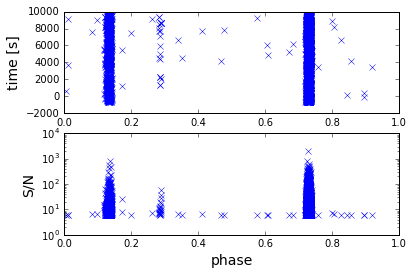

In [62]:
T, SN, phase = np.loadtxt('gp.txt', dtype='string').T

T = Time(T, precision=9)
SN = SN.astype('float')
phase = phase.astype('float')

#psr_polyco = Polyco('polycob0531+21_wb.dat')
#phase_pol = psr_polyco.phasepol(T[0])

#phase = np.remainder(phase_pol(T.mjd), 1)
SNcut = 6

T = T[SN>SNcut]
phase = phase[SN>SNcut]
SN = SN[SN>SNcut]

plt.subplot(211)
plt.plot(phase, T.unix - T[0].unix, 'bx')
plt.xlim(0,1)

plt.ylabel('time [s]', fontsize=14)

plt.subplot(212)
plt.plot(phase, SN, 'bx')
plt.xlim(0,1)
plt.yscale('log')

plt.xlabel('phase', fontsize=14)
plt.ylabel('S/N', fontsize=14)

MPT = T[abs(phase-0.73)<0.05]
MPSN = SN[abs(phase-0.73)<0.05]
MPphase = phase[abs(phase-0.73)<0.05]

IPT = T[abs(phase-0.15)<0.05]
IPSN = SN[abs(phase-0.15)<0.05]
IPphase = phase[abs(phase-0.15)<0.05]

HCT = T[abs(phase-0.28)<0.05]
HCSN = SN[abs(phase-0.28)<0.05]
HCphase = phase[abs(phase-0.28)<0.05]


plt.savefig('CrabWb-phase.png')

(0.71, 0.75)

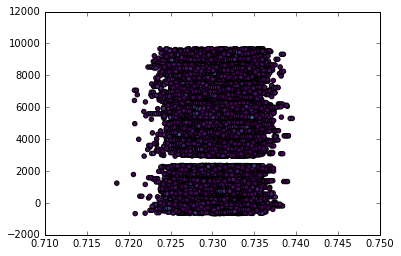

In [63]:
plt.scatter(MPphase, (MPT.unix-MPT[0].unix), c=np.sqrt(MPSN), cmap=cm.viridis)

plt.xlim(0.71, 0.75)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in divide


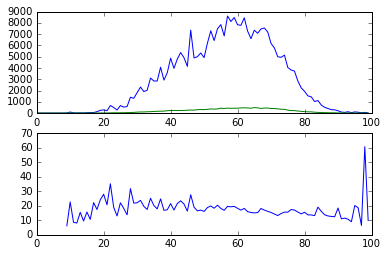

In [64]:
MPSN_bin = MPSN[(MPphase > 0.715) & (MPphase < 0.750)]
MPphase_bin = MPphase[(MPphase > 0.715) & (MPphase < 0.750)]

ngate = 100
MPphase_bin -= min(MPphase_bin)
MPphase_bin = ( MPphase_bin * ngate / (max(MPphase_bin)) ).astype('int')
MPphase_bin[MPphase_bin==ngate] = ngate-1

MPpower = np.zeros(ngate)
ICpower = np.zeros(ngate)

MPpower += np.bincount(MPphase_bin, MPSN_bin, ngate)
ICpower += np.bincount(MPphase_bin, MPSN_bin != 0 , ngate)

plt.subplot(311)
plt.plot(MPpower)
plt.plot(ICpower)

plt.subplot(312)
plt.plot(MPpower / ICpower)


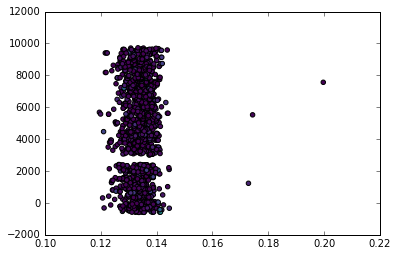

In [65]:
plt.scatter(IPphase, (IPT.unix-IPT[0].unix), c=np.sqrt(IPSN), cmap=cm.viridis)

#plt.xlim(0.71, 0.75)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in divide


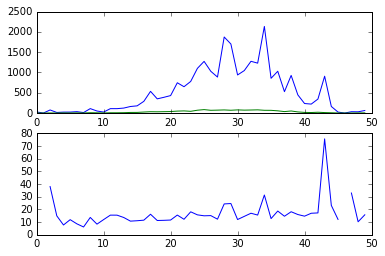

In [68]:
IPSN_bin = IPSN[(IPphase > 0.115) & (IPphase < 0.150)]
IPphase_bin = IPphase[(IPphase > 0.115) & (IPphase < 0.150)]

ngate = 50
IPphase_bin -= min(IPphase_bin)
IPphase_bin = ( IPphase_bin * ngate / (max(IPphase_bin)) ).astype('int')
IPphase_bin[IPphase_bin==ngate] = ngate-1

IPpower = np.zeros(ngate)
IPCpower = np.zeros(ngate)

IPpower += np.bincount(IPphase_bin, IPSN_bin, ngate)
IPCpower += np.bincount(IPphase_bin, IPSN_bin != 0 , ngate)

plt.subplot(211)
plt.plot(IPpower)
plt.plot(IPCpower)

plt.subplot(212)
plt.plot(IPpower / IPCpower)


['2015-01-10T22:33:12.023928000' '2015-01-10T22:33:12.023960000'
 '2015-01-10T22:48:34.523600000' '2015-01-10T22:48:37.523432000'
 '2015-01-10T22:48:37.523440000' '2015-01-10T22:45:00.524240000'
 '2015-01-10T23:25:51.523984000' '2015-01-10T23:34:36.023376000'
 '2015-01-10T23:24:06.024280000' '2015-01-10T23:50:07.522896000'
 '2015-01-11T00:08:52.023104000' '2015-01-11T00:19:07.023104000'
 '2015-01-11T00:19:07.023112000' '2015-01-11T00:25:42.023928000'
 '2015-01-11T00:32:35.023912000' '2015-01-11T00:34:26.523560000'
 '2015-01-11T00:34:26.523568000' '2015-01-11T00:34:26.523576000'
 '2015-01-11T00:34:26.523600000' '2015-01-11T00:34:26.523608000'
 '2015-01-11T00:34:26.523616000' '2015-01-11T00:43:02.359736000'
 '2015-01-11T00:48:09.523464000' '2015-01-11T00:48:09.523480000']


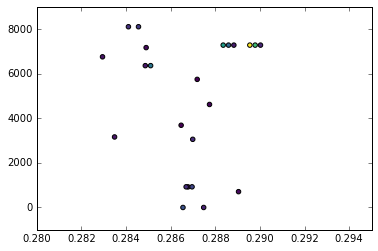

In [73]:
plt.scatter(HCphase, (HCT.unix-HCT[0].unix), c=np.sqrt(HCSN), cmap=cm.viridis)
plt.xlim(0.28, 0.295)

print HCT.isot

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in divide


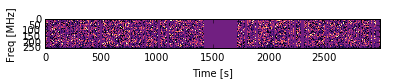

In [69]:
f = np.zeros((3000,256))
tchunk=2

for i in range(3000):
    j = tchunk*i*u.s
    k = (tchunk*i+tchunk)*u.s
    Tbin = ((j+k)/2).value
    times = MPT[abs(MPT.unix-MPT[0].unix - Tbin) < tchunk/2]
    weights = MPSN[abs(MPT.unix-MPT[0].unix - Tbin) < tchunk/2]
    
    for tgp, weight in zip(times,weights):
        dchan=np.load('/media/drive2/GPs/GP%s.npy' % (tgp))
        dR = np.concatenate((dchan[:,::-1,2][:,:-1], dchan[...,0][:,1:]), axis=1)
        dL = np.concatenate((dchan[:,::-1,3][:,:-1], dchan[...,1][:,1:]), axis=1)
        x = (abs(dR)**2 + abs(dL)**2)
        pulse = x[49:53].mean(0)
        bg = x[10:30].mean(0)
        GP=(pulse - bg)
        f[i] += weight*GP #/GP.std()

MPdyn = (f - f.mean(axis=1, keepdims=True)) / f.std(axis=1, keepdims=True)
MPdyn[np.isnan(MPdyn)]=0
plt.imshow(MPdyn.T, interpolation='nearest', cmap=cm.magma, vmin=-1.5, vmax=3)
plt.xlabel('Time [s]')
plt.ylabel('Freq [MHz]')
#plt.colorbar()

plt.savefig('MPdyn.png', dpi=500)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in divide


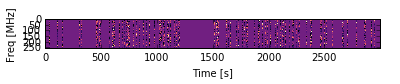

In [72]:
f = np.zeros((3000,256))
tchunk=2

for i in range(3000):
    j = tchunk*i*u.s
    k = (tchunk*i+tchunk)*u.s
    Tbin = ((j+k)/2).value
    times = IPT[abs(IPT.unix-IPT[0].unix - Tbin) < tchunk/2]
    weights = IPSN[abs(IPT.unix-IPT[0].unix - Tbin) < tchunk/2]
    
    for tgp, weight in zip(times,weights):
        dchan=np.load('/media/drive2/GPs/GP%s.npy' % (tgp))
        dR = np.concatenate((dchan[:,::-1,2][:,:-1], dchan[...,0][:,1:]), axis=1)
        dL = np.concatenate((dchan[:,::-1,3][:,:-1], dchan[...,1][:,1:]), axis=1)
        x = (abs(dR)**2 + abs(dL)**2)
        pulse = x[49:53].mean(0)
        bg = x[10:30].mean(0)
        GP=(pulse - bg)
        f[i] += GP#/GP.std()

IPdyn = (f - f.mean(axis=1, keepdims=True)) / f.std(axis=1, keepdims=True)
IPdyn[np.isnan(IPdyn)]=0
plt.imshow(IPdyn.T, interpolation='nearest', cmap=cm.magma, vmin=-1.5, vmax=3)
          #aspect='auto', extent=(0,900,1684,1652))
plt.xlabel('Time [s]')
plt.ylabel('Freq [MHz]')

plt.savefig('IPdyn.png', dpi=500)

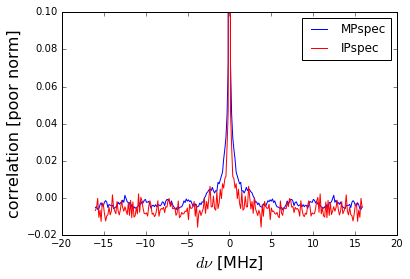

In [73]:
fcorrMM = np.zeros(236)
fcorrII = np.zeros(236)

for i in range(236):
    d1 = 1.*np.roll(MPdyn[:,10:-10],i, axis=1)
    d2 = 1.*np.roll(IPdyn[:,10:-10],i, axis=1)
    fcorrMM[i] = np.mean(d1*MPdyn[:,10:-10])
    fcorrII[i] = np.mean(d2*IPdyn[:,10:-10])
    #corrII[i] = np.mean(d2*IPdyn)

#plt.subplot(211)
plt.plot(np.linspace(-16,16,237)[:-1], np.roll(fcorrMM,118), label='MPspec')
plt.plot(np.linspace(-16,16,237)[:-1], np.roll(fcorrII,118)*5, 'r', label='IPspec')

plt.ylim(-0.02,0.1)

plt.xlabel(r'$d \nu$ [MHz]', fontsize=16)
plt.ylabel('correlation [poor norm]', fontsize=16)
plt.legend()

plt.savefig('CrabWb-ScintBW.png')

(-200, 200)

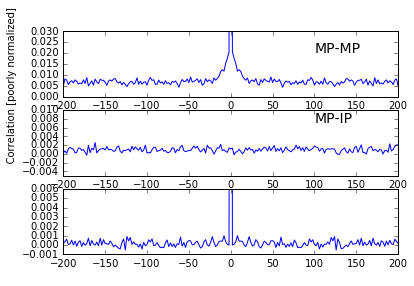

In [74]:
bins=3000

corrMM = np.zeros(bins)
corrIM = np.zeros(bins)
corrII = np.zeros(bins)

for i in range(bins):
    d1 = 1.*np.roll(MPdyn[:,10:-10],i, axis=0)
    d2 = 1.*np.roll(IPdyn[:,10:-10],i, axis=0)
    corrMM[i] = np.mean(d1*MPdyn[:,10:-10])
    corrIM[i] = np.mean(d2*MPdyn[:,10:-10])
    corrII[i] = np.mean(d2*IPdyn[:,10:-10])

plt.subplot(311)
plt.plot(np.linspace(-bins,bins,bins+1)[:-1], np.roll(corrMM,bins//2))
plt.ylim(0.00,0.03)
plt.text(100, 0.02, 'MP-MP', fontsize='14')
plt.xlim(-200,200)
#plt.xscale('log')

plt.subplot(312)
plt.plot(np.linspace(-bins,bins,bins+1)[:-1], np.roll(corrIM,bins//2))
plt.ylim(-0.005,0.01)
plt.xlim(-200,200)
plt.text(100, 0.007, 'MP-IP', fontsize='14')

plt.xlabel('dt [s]')
#plt.xlim(-5,250)
#plt.xscale('log')

plt.ylabel('                                     Correlation [poorly normalized]')

plt.savefig('CrabWB-Dyncorr.png')

plt.subplot(313)
plt.plot(np.linspace(-bins,bins,bins+1)[:-1], np.roll(corrII,bins//2))
plt.ylim(-0.001,0.006)
plt.xlim(-200,200)
#plt.xscale('log')

In [82]:
crosscorrMM = np.zeros((225, 128))
#corrIM = np.zeros(450)
#corrII = np.zeros(450)

#crosscorrMM = np.c

for i in range(225):
    for j in range(128):
        d1 = 1.*np.roll(IPdyn[:,10:-10],i, axis=0)
        d1 = 1.*np.roll(d1, j, axis=1)
        #d2 = 1.*np.roll(IPdyn[:,10:-10],i, axis=0)
        crosscorrMM[i,j] = np.mean(d1*IPdyn[:,10:-10])
        #corrIM[i] = np.mean(d2*MPdyn[:,10:-10])
        #corrII[i] = np.mean(d2*IPdyn[:,10:-10])
   

ERROR: KeyboardInterrupt [numpy.core.numeric]


KeyboardInterrupt: 

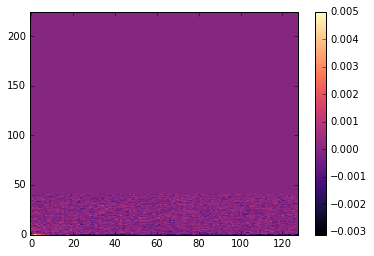

In [83]:
plt.imshow(crosscorrMM, aspect='auto', interpolation='nearest', cmap=cm.magma, vmax=0.005,
          origin='lower')
plt.colorbar()

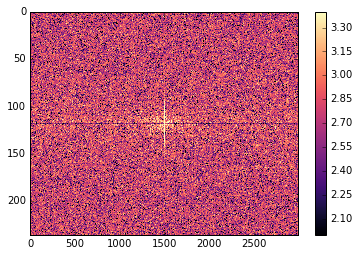

In [81]:
ss = np.fft.fft2(MPdyn[:,10:-10])
ss = np.fft.fftshift(ss)

plt.imshow(np.log10(abs(ss)).T, aspect='auto', interpolation='nearest', cmap=cm.magma, vmin=2.0, vmax=3.4)
plt.colorbar()

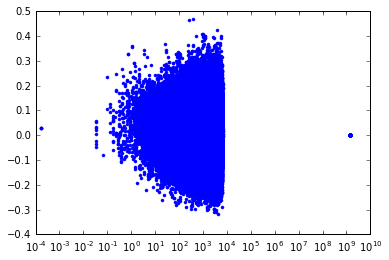

In [63]:
#!/usr/bin/env python

import os
import glob

nfreq=236 # Number of frequency bins, currently hardcoded.

n=len(T)
t=np.zeros(n)
dt=(np.zeros(n**2))
GPs=np.zeros((n,nfreq))
corr=np.zeros(n**2)

i=0
for tgp in MPT:
    dchan=np.load('/media/drive2/GPs/GP%s.npy' % (tgp))
    dR = np.concatenate((dchan[:,::-1,2][:,:-1], dchan[...,0][:,1:]), axis=1)
    dL = np.concatenate((dchan[:,::-1,3][:,:-1], dchan[...,1][:,1:]), axis=1)
    x = (abs(dR)**2 + abs(dL)**2)
    pulse = x[49:52,10:-10].mean(0)
    bg = x[10:14,10:-10].mean(0)
    GP=(pulse - bg)
    GPs[i]=(GP - GP.mean())/np.sqrt(np.std(GP)**2.0 - np.std(bg)**2.0)
    t[i]=tgp.unix
    i+=1

for j in xrange(n):
    GP_temp=GPs[j]
    GP_temp=GP_temp[np.newaxis,:]
    #norm = np.sqrt(np.sum(GP_temp*GP_temp) * (GPs*GPs).sum(1))
    corr[j*n:(j+1)*n] = (GP_temp*GPs).mean(1)
    dt[j*n:(j+1)*n] = t-t[j]

corr=corr[dt>1E-4]
dt=dt[dt>1E-4]

plt.plot(dt,corr,'.')
plt.xscale('log')

2015-01-10T22:08:55.771184000
(1037,)


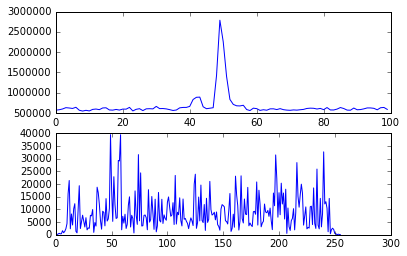

In [195]:

t_gp = (MPT[106])

dchan=np.load('/media/drive2/GPs/GP%s.npy' % (t_gp))
print t_gp

dR = np.concatenate((dchan[:,::-1,2][:,:-1], dchan[...,0][:,1:]), axis=1)
dL = np.concatenate((dchan[:,::-1,3][:,:-1], dchan[...,1][:,1:]), axis=1)
x = (abs(dR)**2 + abs(dL)**2)

print MPT.shape

plt.subplot(211)
plt.plot(x.sum(-1))

plt.subplot(212)
plt.plot(x[50])

In [21]:

"""
Create Profiles of all GPs
"""

for tgp in MPT:

    dchan = np.load('GPs/GP%s.npy' % (tgp))
    dchan = rechannelize(dchan,4)
    dR = np.concatenate((dchan[:,::-1,2][:,:-1], dchan[...,0][:,1:]), axis=1)[1500:1900]
    dL = np.concatenate((dchan[:,::-1,3][:,:-1], dchan[...,1][:,1:]), axis=1)[1500:1900]
    I, Q, U, V = Stokes(dR, dL)
    
    L = Q + 1j*U
    Lb = L.reshape(-1,4,8).mean(axis=1)
    
    xp = np.linspace(0,100,401)[:-1]
    xb = np.linspace(0,100,101)[:-1]
    
    #plt.subplot(211)
    plt.plot(xp, I.sum(1) - I.sum(1)[:40].mean(0), 'k', label='I')
    plt.plot(xp, abs(L).sum(1) - abs(L).sum(1)[:40].mean(0), 'r', label='|L|')
    plt.plot(xp, V.sum(1) - V.sum(1)[:40].mean(0), 'b', label='V')
    plt.legend()
    plt.ylabel('Intensity')
    
    #plt.subplot(212)
    
    #plt.plot(xb, np.angle(Lb.sum(-1)), 'k+')
    
    plt.xlabel(r'time $[\mu s]$')
    #plt.ylabel('Pol angle [rad]')
    
    plt.savefig('CrabWb_GP%s.pdf' % (tgp.isot))
    plt.clf()
    

ERROR: TypeError: scalar 'Time' object is not iterable. [astropy.time.core]


TypeError: scalar 'Time' object is not iterable.

In [170]:
    tgp = MPT[5]
    #tgp = '2015-01-10T22:06:02.859448000'
    
    dchan = np.load('GPs/GP%s.npy' % (tgp))
    dchan = rechannelize(dchan,256)
    dR = np.concatenate((dchan[:,::-1,2][:,:-1], dchan[...,0][:,1:]), axis=1)
    dL = np.concatenate((dchan[:,::-1,3][:,:-1], dchan[...,1][:,1:]), axis=1)
    I, Q, U, V = Stokes(dR, dL)
    
    L = Q + 1j*U
    Lb = L.reshape(-1,4,8).mean(axis=1)
    
    xp = np.linspace(0,100,401)[:-1]
    xb = np.linspace(0,100,101)[:-1]
    
    #plt.subplot(211)
    #plt.plot(xp, I.sum(1) - I.sum(1)[:40].mean(0), 'k', label='I')
    plt.plot(I.sum(1))
    plt.legend()
    plt.ylabel('Intensity')
    
    #plt.subplot(212)
    
    #plt.plot(xb, np.angle(Lb.sum(-1)), 'k+')
    
    plt.xlabel(r'time $[\mu s]$')
    plt.yscale('log')
    #plt.ylabel('Pol angle [rad]')

ERROR: NameError: name 'rechannelize' is not defined [IPython.core.interactiveshell]


NameError: name 'rechannelize' is not defined

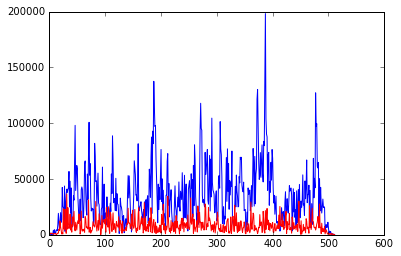

In [62]:
#I2 = 1.*I
plt.plot(I[25])
plt.plot(I2[25],'r')

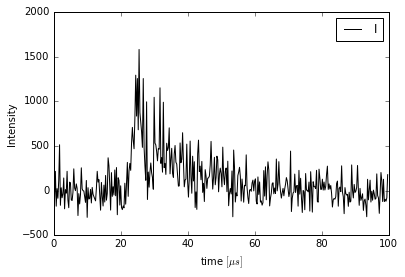

In [36]:
t_ref = '2015-01-10T22:06:04.746776000'
t2 = '2015-01-10T22:06:02.859448000'


dchan = np.load('GPs/GP%s.npy' % (t2))
dchan = rechannelize(dchan,4)
dR = np.concatenate((dchan[:,::-1,2][:,:-1], dchan[...,0][:,1:]), axis=1)[1500:1900]
dL = np.concatenate((dchan[:,::-1,3][:,:-1], dchan[...,1][:,1:]), axis=1)[1500:1900]
I, Q, U, V = Stokes(dR, dL)
    
L = Q + 1j*U
Lb = L.reshape(-1,4,8).mean(axis=1)
    
xp = np.linspace(0,100,401)[:-1]
xb = np.linspace(0,100,101)[:-1]
    
plt.plot(xp, I.sum(1) - I.sum(1)[:40].mean(0), 'k', label='I')
plt.legend()
plt.ylabel('Intensity')
            
plt.xlabel(r'time $[\mu s]$')


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in divide


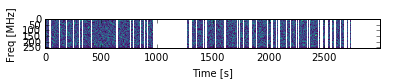

In [39]:
f = np.zeros((3000,256)).astype('complex')
tchunk=2

for i in range(3000):
    j = tchunk*i*u.s
    k = (tchunk*i+tchunk)*u.s
    Tbin = ((j+k)/2).value
    times = MPT[abs(MPT.unix-MPT[0].unix - Tbin) < tchunk/2]
    weights = MPSN[abs(MPT.unix-MPT[0].unix - Tbin) < tchunk/2]
    
    for tgp, weight in zip(times,weights):
        dchan=np.load('/media/drive2/GPs/GP%s.npy' % (tgp))
        dR = np.concatenate((dchan[:,::-1,2][:,:-1], dchan[...,0][:,1:]), axis=1)
        dL = np.concatenate((dchan[:,::-1,3][:,:-1], dchan[...,1][:,1:]), axis=1)
        #x = (abs(dR)**2 + abs(dL)**2)
        x = dR
        pulse = x[49:53].mean(0)
        #bg = x[10:30].mean(0)
        #GP=(pulse - bg)
        f[i] += weight*pulse #/GP.std()

MPdyn = (abs(f) - abs(f).mean(axis=1, keepdims=True)) / f.std(axis=1, keepdims=True)
plt.imshow(MPdyn.T, interpolation='nearest', cmap=cm.viridis)
plt.xlabel('Time [s]')
plt.ylabel('Freq [MHz]')


In [57]:
MPsub = np.array(f[:960])

MPsub /= (abs(MPsub).mean(axis=1, keepdims=True) +1e-10)
MPsub[np.isnan(MPsub)] = 0

ss = np.fft.fft2(MPsub)
ss = np.fft.fftshift(ss)

%matplotlib qt
plt.imshow(np.log10(abs(ss)**2.0).T, aspect='auto', interpolation='nearest', cmap=cm.viridis,
          vmin=2, vmax=6)
plt.colorbar()


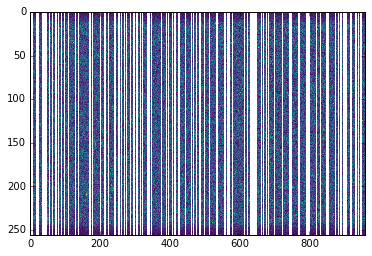

In [22]:
plt.imshow(abs(MPsub).T, interpolation='nearest', aspect='auto', cmap=cm.viridis)

In [46]:
for i in range(960):
    if np.isnan(MPsub[i,0]):
        print("NAN!")
        print(i)

NAN!
693


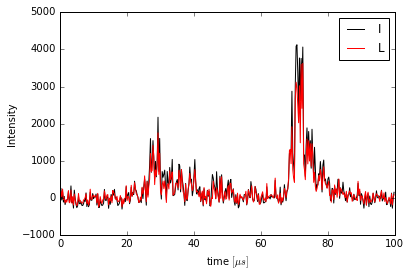

In [77]:
"""
HF giant pulse
"""

t1 = '2015-01-11T00:34:26.523560000'
t2 = '2015-01-11T00:34:26.523600000'

dchan = np.load('GPs/GP%s.npy' % (t1))
dchan = rechannelize(dchan,4)
dR = np.concatenate((dchan[:,::-1,2][:,:-1], dchan[...,0][:,1:]), axis=1)[1500:1900]
dL = np.concatenate((dchan[:,::-1,3][:,:-1], dchan[...,1][:,1:]), axis=1)[1500:1900]
I, Q, U, V = Stokes(dR, dL)
    
L = Q + 1j*U
Lb = L.reshape(-1,4,8).mean(axis=1)
    
xp = np.linspace(0,100,401)[:-1]
xb = np.linspace(0,100,101)[:-1]
    
plt.plot(xp, I.sum(1) - I.sum(1)[:15].mean(0), 'k', label='I')
plt.plot(xp, abs(L).sum(1) - abs(L).sum(1)[:15].mean(0), 'r', label='L')

plt.legend()
plt.ylabel('Intensity')
            
plt.xlabel(r'time $[\mu s]$')

